In [2]:
# Data manipulation
from datetime import datetime
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
from matplotlib.colors import DivergingNorm
import seaborn as sns
sns.set_style('whitegrid')

# preprocessing
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer, LabelEncoder



# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
# Classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier


# Regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve


np.warnings.filterwarnings('ignore')

In [3]:
avo = pd.read_csv("avocado.csv")
display(avo.head(5))


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
print(avo.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB
None


In [9]:
print(avo.describe())


         Unnamed: 0  AveragePrice  Total Volume          4046          4225  \
count  18249.000000  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04   
mean      24.232232      1.405978  8.506440e+05  2.930084e+05  2.951546e+05   
std       15.481045      0.402677  3.453545e+06  1.264989e+06  1.204120e+06   
min        0.000000      0.440000  8.456000e+01  0.000000e+00  0.000000e+00   
25%       10.000000      1.100000  1.083858e+04  8.540700e+02  3.008780e+03   
50%       24.000000      1.370000  1.073768e+05  8.645300e+03  2.906102e+04   
75%       38.000000      1.660000  4.329623e+05  1.110202e+05  1.502069e+05   
max       52.000000      3.250000  6.250565e+07  2.274362e+07  2.047057e+07   

               4770    Total Bags    Small Bags    Large Bags    XLarge Bags  \
count  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000   
mean   2.283974e+04  2.396392e+05  1.821947e+05  5.433809e+04    3106.426507   
std    1.074641e+05  9.862424e+05  7.461785e+05 

In [7]:
print("\n", avo.shape)


 (18249, 13)


In [6]:
#Unnamed is not a meaningful column and hence let's drop it 
avo.drop('Unnamed: 0', axis=1, inplace=True)

KeyError: "['Unnamed: 0'] not found in axis"

In [9]:
#Let us check the number of null values
avo.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [10]:
#Let's do some desciptive analytics before we can move further 
avo.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [11]:
avo.select_dtypes('object').columns
#There are three columns of type object 

Index(['Date', 'type', 'region'], dtype='object')

conventional    9126
organic         9123
Name: type, dtype: int64


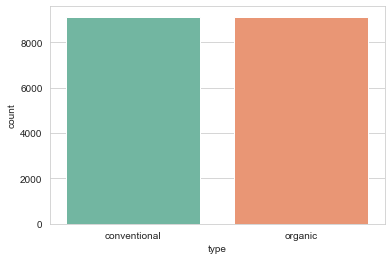

In [15]:
#Let's plot a bar chart of the type 
print(avo['type'].value_counts())
sns.countplot('type', data=avo, palette='Set2')

plt.show()

#The two classes are very well distributed and we can use this data as a classifier to ML algos

Orlando                338
RaleighGreensboro      338
BuffaloRochester       338
Seattle                338
Southeast              338
Detroit                338
Houston                338
Tampa                  338
HarrisburgScranton     338
CincinnatiDayton       338
Charlotte              338
GrandRapids            338
SouthCentral           338
BaltimoreWashington    338
StLouis                338
Spokane                338
DallasFtWorth          338
West                   338
Jacksonville           338
GreatLakes             338
RichmondNorfolk        338
California             338
Chicago                338
PhoenixTucson          338
LosAngeles             338
Pittsburgh             338
Northeast              338
Portland               338
Midsouth               338
HartfordSpringfield    338
TotalUS                338
Columbus               338
NewOrleansMobile       338
Nashville              338
SanFrancisco           338
Syracuse               338
Sacramento             338
A

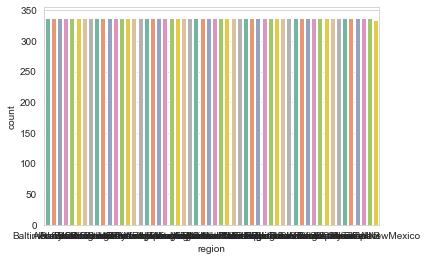

In [16]:
#Let's plot region 
print(avo['region'].value_counts())
print('\n', 'There are:', len(avo['region'].unique()), 'unique values in the feature')
sns.countplot('region', data=avo, palette='Set2')

plt.show()

#This feature has 54 unique values and they are very well distributed. 

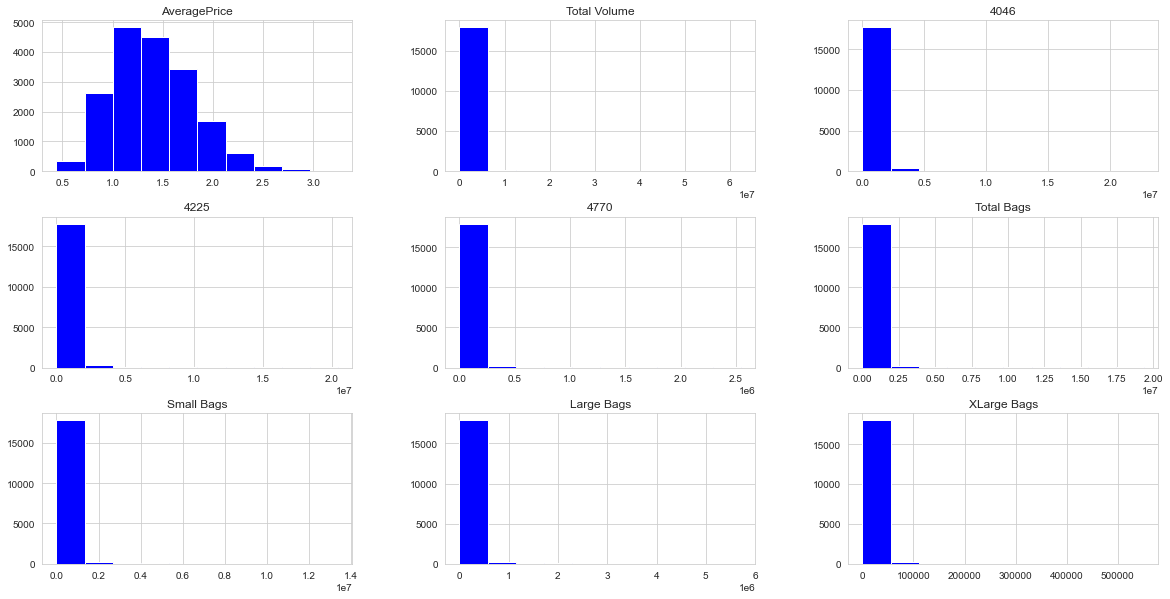

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000


In [17]:
numbers = list(avo.select_dtypes(['float64', 'int64']).keys())
# removing years
numbers.remove('year')

avo[numbers].hist(figsize=(20,10), color='blue', edgecolor='white')

plt.show()

display(avo[numbers].describe())

#Average price is most normally distributed where mean and median are quite close but it is still slightly skewed 
#to the right, since mean is bigger than the median
#The rest of the features seem heavily influenced by the outliers, all these features seem to follow a similar 
#distribution since they are all influenced by quantity sold 

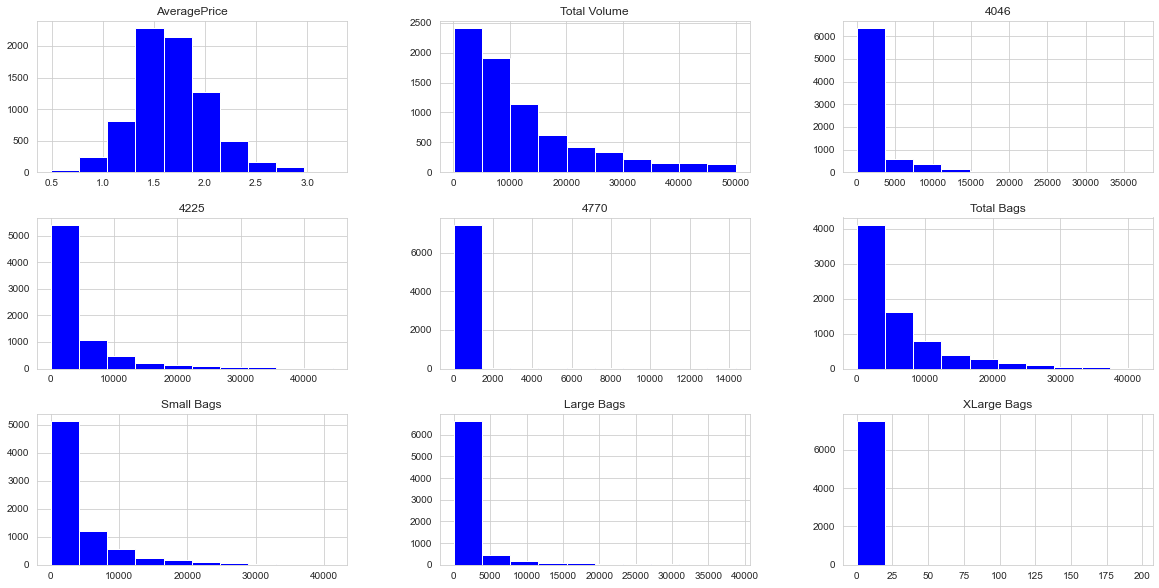

In [18]:
avo_o = avo[avo['Total Volume']<50000]
avo_o[numbers].hist(figsize=(20,10), color='blue', edgecolor='white')

plt.show()

#Let's remove the outliers for quantity and see if the distribution becomes more normal 
#it still does not impact too much

<AxesSubplot:>

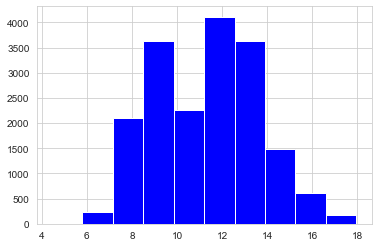

In [19]:
TotalLog = np.log(avo['Total Volume'] + 1)
TotalLog.hist(color='blue', edgecolor='white')

#We can try using log formulas without getting rid of outliers 
#Let's take an example of Total volume and try 
#Using log for total volume normalised it even more 

In [20]:
avo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [21]:
avo['Date'] = avo['Date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

avo['month'] = avo['Date'].dt.month
avo['day'] = avo['Date'].dt.day
# monday = 0
avo['day of week'] = avo['Date'].dt.dayofweek
dates = ['year', 'month', 'day', 'day of week']
avo[dates]

#Split Date into year, month, day and day of week for ease of usage 

,year,month,day,day of week
0,2015,12,27,6
1,2015,12,20,6
2,2015,12,13,6
3,2015,12,6,6
4,2015,11,29,6
...,...,...,...,...
18244,2018,2,4,6
18245,2018,1,28,6
18246,2018,1,21,6
18247,2018,1,14,6


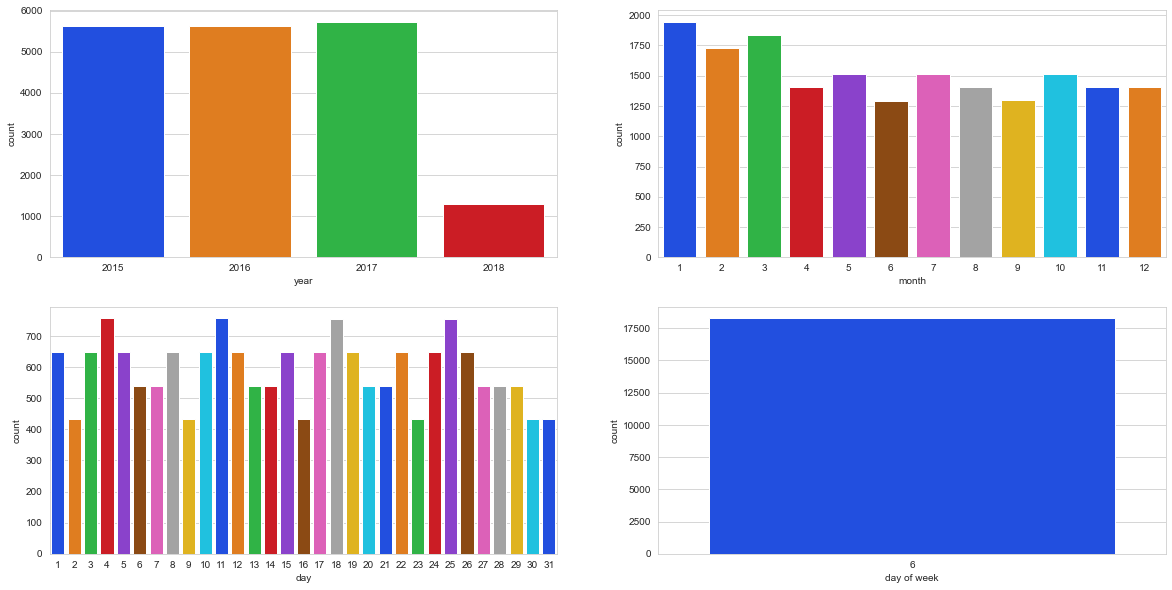

In [22]:
fig, ax = plt.subplots(2,2, figsize=(20,10))

sns.countplot('year', data=avo, ax=ax[0,0], palette= 'bright')
sns.countplot('month', data=avo, ax=ax[0,1], palette='bright')
sns.countplot('day', data=avo, ax=ax[1,0], palette='bright')
sns.countplot('day of week', data=avo, ax=ax[1,1], palette='bright')

plt.show()

#Plot the date after splitting to understand the pattern 
#year - 2015, 2016 and 2017 are almost the same, but 2018 has the lowest count since it ended in the beginning fo the year 
#Month shows a decreasing pattern mostly because of the same reason
#Day chart has a repeating trend, this is due to the data collected on the same day of every week, since this is
#redundant it can be eliminated

In [23]:
avo.drop('day of week', axis=1, inplace=True)

In [24]:
#'type' has 2 categories and is balanced, could be used as a classifier in model building
#'region' has 54 unique values and is perfectly balanced, can not be encoded for model building
#'avg' price shows a pretty normal distribution and looks tentative for target variable for regression model
#units sold columns show similar data which is similarly distributed, log formulas could be used to increase 
#model performance
#'dates' is evenly distributed till 2018 and shows that the data was recorded on a weekly basis every Sunday

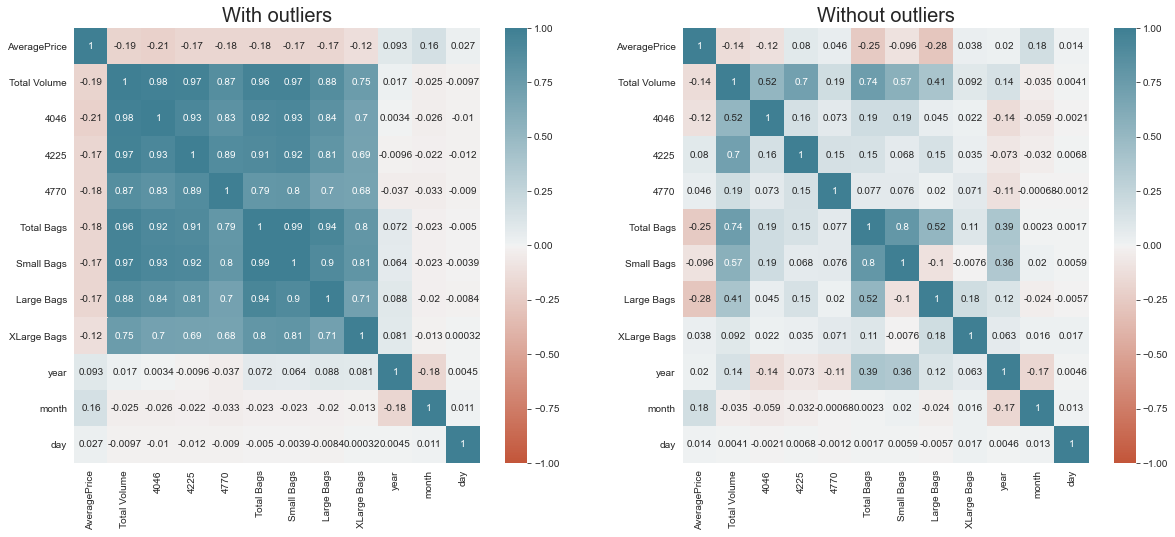

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(20,8))

avo_o = avo[avo['Total Volume']<50000]

sns.heatmap(avo.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True), annot=True, ax=ax[0])
ax[0].set_title('With outliers', fontsize=20)

sns.heatmap(avo_o.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True), annot=True, ax=ax[1])
ax[1].set_title('Without outliers', fontsize=20)

plt.show()

#we are going to consider the variable that has the strongest relationship with volume variable and with date 
#we are also going to consider the variable that has the strongest relationship with average price

<AxesSubplot:xlabel='month', ylabel='AveragePrice'>

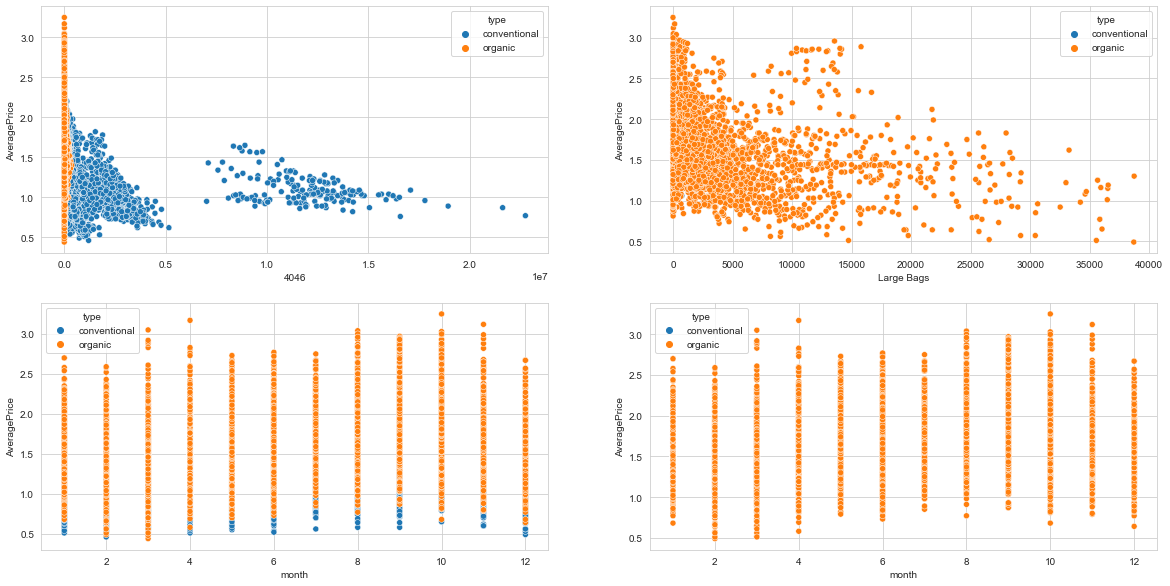

In [26]:
fig, ax = plt.subplots(2, 2, figsize=(20,10))

sns.scatterplot(x='4046', y='AveragePrice', data=avo, hue='type', ax=ax[0,0])
sns.scatterplot(x='Large Bags', y='AveragePrice', data=avo_o, hue='type', ax=ax[0,1])
sns.scatterplot(x='month', y='AveragePrice', data=avo, hue='type', ax=ax[1,0])
sns.scatterplot(x='month', y='AveragePrice', data=avo_o, hue='type', ax=ax[1,1])

#we can see from below that most of the outliers are conventioanl type, and since conventional avocados sell way
#more than organic we cannot remove the outliers, month and average price don't seem to have any relationship
#average price of conventional avocados is way smaller than the avg price of organic avocados 
#There is a decreasing trend between units sold and average price, the more the units sold the lower the average
#price 

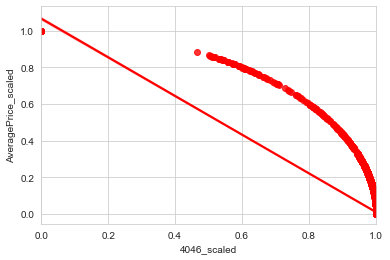

In [27]:
scaler = Normalizer()
scaler.fit(avo[['4046', 'AveragePrice']].values)
avo['4046_scaled'] = scaler.transform(avo[['4046', 'AveragePrice']].values)[:,0]
avo['AveragePrice_scaled'] = scaler.transform(avo[['4046', 'AveragePrice']].values)[:,1]

sns.regplot(x='4046_scaled', y='AveragePrice_scaled', data=avo, color='r')
plt.show()

#Instead of removing the outliers let us try and normalise the data for average price and 4046
#we can now be sure that regression and classification are possible since there is a clear tendency 

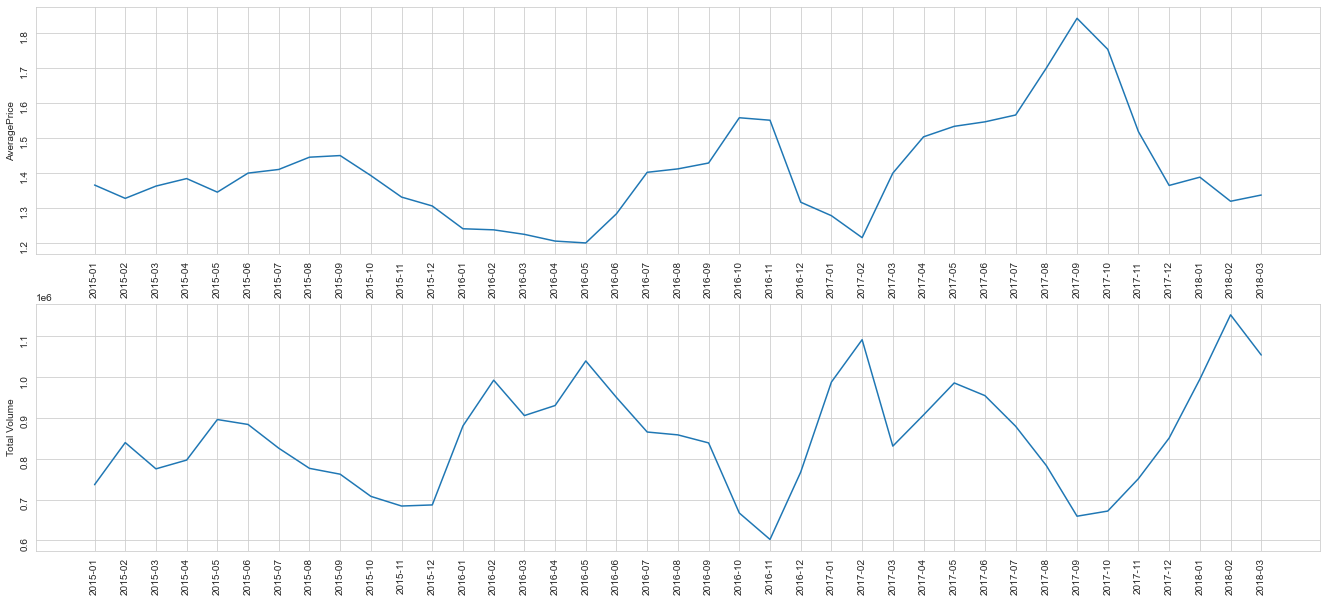

In [28]:

fig, ax = plt.subplots(2, 1, figsize=(23,10))

avo['year_month'] = avo['Date'].dt.to_period('M')
grouped = avo.groupby('year_month')[['AveragePrice', 'Total Volume']].mean()

ax[0].plot(grouped.index.astype(str), grouped['AveragePrice'])
ax[0].tick_params(labelrotation=90)
ax[0].set_ylabel('AveragePrice')


ax[1].plot(grouped.index.astype(str), grouped['Total Volume'])
ax[1].tick_params(labelrotation=90)
ax[1].set_ylabel('Total Volume')

plt.show()

#Let us predict price and volume in a time series analysis


We can clearly see that average price and total volume move in different directions. 
Total volume has a pike at the beginning of the year and Average price take a dip at the beginning of the year.
The drops and pikes can help us predict seasonality 

Exploratory data analysis conclusions

1. Conventional avocados sell way more in number than the organic ones, hence Total volume, Average price and a few other volume variables will be useful to predict the type in classification model
2. The fact that Avergae price and Total volume move in different direction might help in regression analysis over target variable average price 
3. The time series exploration where Total volume pikes and Average price dips in the beginning of the year provides a seasonlity and forecasting possibility. 

Let us do some more analysis before running the classification and regression models 

Let us figure out which type sells better and which one is more expensive 

In [29]:
avo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 18249 non-null  datetime64[ns]
 1   AveragePrice         18249 non-null  float64       
 2   Total Volume         18249 non-null  float64       
 3   4046                 18249 non-null  float64       
 4   4225                 18249 non-null  float64       
 5   4770                 18249 non-null  float64       
 6   Total Bags           18249 non-null  float64       
 7   Small Bags           18249 non-null  float64       
 8   Large Bags           18249 non-null  float64       
 9   XLarge Bags          18249 non-null  float64       
 10  type                 18249 non-null  object        
 11  year                 18249 non-null  int64         
 12  region               18249 non-null  object        
 13  month                18249 non-

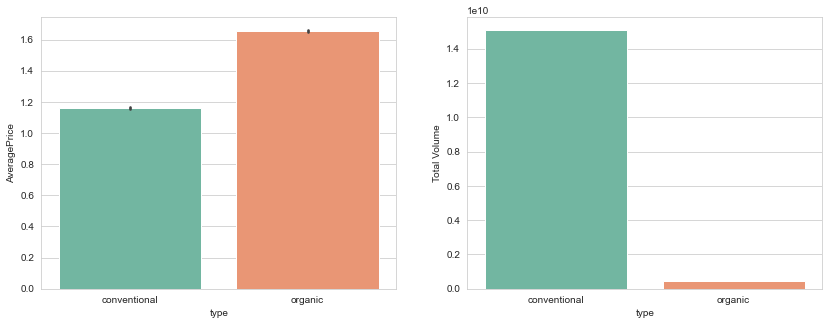

type
conventional    1.158040
organic         1.653999
Name: AveragePrice, dtype: float64

type
conventional    1.508722e+10
organic         4.361817e+08
Name: Total Volume, dtype: float64

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(14,5))

sns.barplot(x='type', y='AveragePrice', data=avo, palette='Set2', ax=ax[0])
sns.barplot(x='type', y='Total Volume', data=avo, palette='Set2', ax=ax[1], estimator=sum, ci=None)
plt.show()

display(avo.groupby('type')['AveragePrice'].mean())
display(avo.groupby('type')['Total Volume'].sum())

We can clearly see that Conventional is much cheaper than organic but it also looks like conventional killed the sales of organic avocados 

So clearly, conventional avocados are performing quite well and organic ones are not, so it is important to know if organic is gaining any kind of popularity atleast. 

Let us verify if organic avocados are gaining popularity


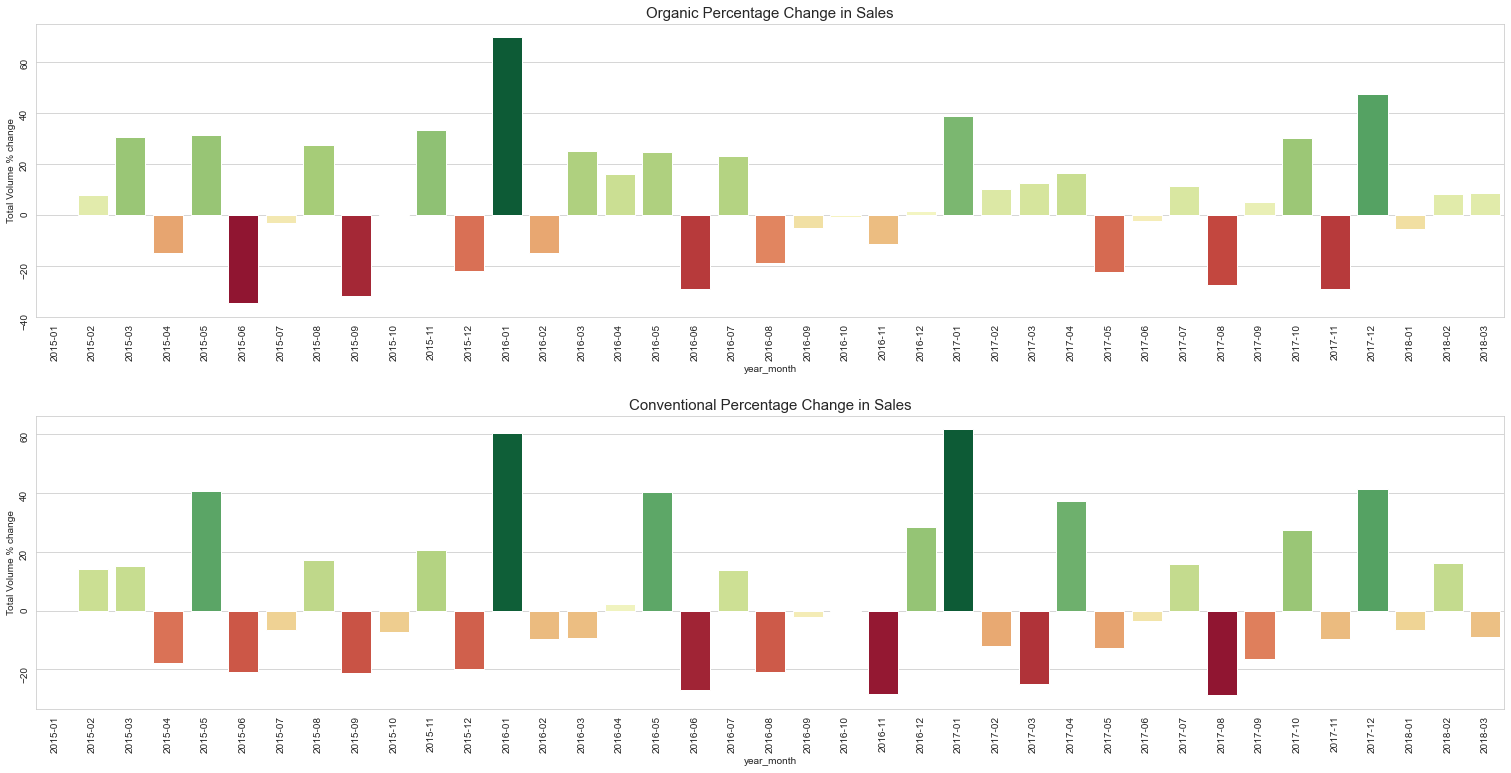

The sum of percentage change of Organic is: 200.48
The sum of percentage change of Conventional is: 137.02


In [31]:
fig, ax = plt.subplots(2, 1, figsize=(23,12))
fig.tight_layout(pad=8)


group = avo.groupby(['type', 'year_month'])['Total Volume'].sum()

organic = group['organic']
organic = pd.DataFrame(organic)
organic['Total Volume % change'] = np.round(organic['Total Volume'].pct_change() * 100, 2)

conventional = group['conventional']
conventional = pd.DataFrame(conventional)
conventional['Total Volume % change'] = np.round(conventional['Total Volume'].pct_change() * 100, 2)

norm = DivergingNorm(vmin=organic['Total Volume % change'].min(), vcenter=0, vmax=organic['Total Volume % change'].max())
colors = [plt.cm.RdYlGn(norm(c)) for c in organic['Total Volume % change']]
sns.barplot(x=organic.index, y=organic['Total Volume % change'], data=organic, ax=ax[0], palette=colors)

norm = DivergingNorm(vmin=conventional['Total Volume % change'].min(), vcenter=0, vmax=conventional['Total Volume % change'].max())
colors = [plt.cm.RdYlGn(norm(c)) for c in conventional['Total Volume % change']]
sns.barplot(x=conventional.index, y=conventional['Total Volume % change'], data=conventional, ax=ax[1], palette=colors)


ax[0].tick_params(labelrotation=90)
ax[0].set_title('Organic Percentage Change in Sales', fontsize=15)

ax[1].tick_params(labelrotation=90)
ax[1].set_title('Conventional Percentage Change in Sales', fontsize=15)

plt.show()

conventional['Total Volume % change'].mean()
print("The sum of percentage change of Organic is: {}".format(np.around(organic['Total Volume % change'].sum(), 2)))
print("The sum of percentage change of Conventional is: {}".format(np.around(conventional['Total Volume % change'].sum(), 2)))

If we sum every percentage change, we find that organic has a better growth overall with 200.48 while conventional has 137.02 but its hard to conclude anything through this

So let us use the BCG matrix to evaluate the performance of the business based on its market growth rate and relative market share. BCG matrix has 4 components : 
1. Dogs - Products with low growth and low market share
2. Question marks or problem child - Products with high growth and low market share
3. Stars - Products with high growth and high market share
4. Cash cows - Products with low growth and high market share 

Now let us apply this to our model 

Organic Avocados have a low market share and a high growth rate. This makes it a problem child according to BCG matrix. The business strategy should hence be to pull out money from the cash cow and invest here so its market share could improve and it can move the Star quadrant. 

Conventional avocados have a low cash usage or growth rate and high cash generation or market share. This makes it a Cash Cow in BCG matrix. We should pull out money from here and invest on organic which would make it a Star product. 

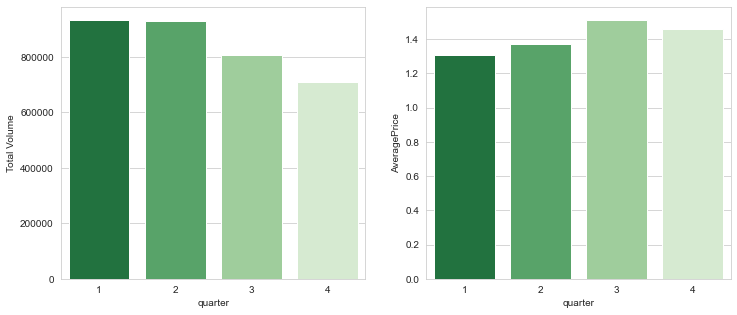

,Total Volume,AveragePrice
quarter,,
1,933371.788252,1.306605
2,928527.872254,1.375033
3,808062.047498,1.512913
4,710750.427752,1.458588


In [32]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))

avo['quarter'] = avo['Date'].dt.quarter


sns.barplot(x='quarter', y='Total Volume', data=avo, palette='Greens_r', ci=None, ax=ax[0])
sns.barplot(x='quarter', y='AveragePrice', data=avo, palette='Greens_r', ci=None, ax=ax[1])


plt.show()

quarter = avo.groupby('quarter')[['Total Volume', 'AveragePrice']].mean()
display(quarter)

We are now figuring out the Total volume and the Average price for each quarter. Below are the observations
1. Total volume of Avocados that are sold in the first quarter is the highest compared to others
2. Prices are the lowest in the first quarter and it increses in the consecutive quarters 
3. Based on the popularity of the avocados, it seems that businesses should import avocados from other countries when the supply is low and demand is high. 

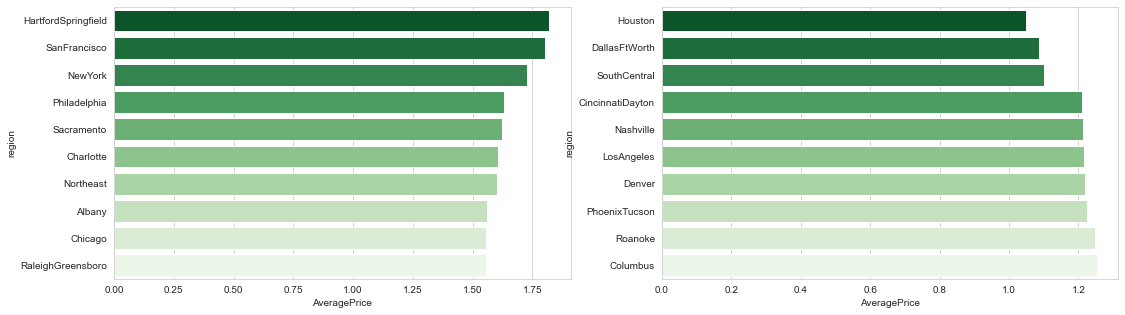

the most expensive avocados can be found in ['HartfordSpringfield', 'SanFrancisco', 'NewYork', 'Philadelphia', 'Sacramento'] 
the cheapest avocados can be found in ['Houston', 'DallasFtWorth', 'SouthCentral', 'CincinnatiDayton', 'Nashville'] 


In [33]:
fig, ax = plt.subplots(1, 2, figsize=(18,5))

regionP = avo.groupby('region')['AveragePrice'].mean()

expensive = regionP.sort_values(ascending = False).iloc[:10]
cheap = regionP.sort_values().iloc[:10]

sns.barplot(x='AveragePrice', y='region', data = avo, order=expensive.index, ci=None, palette='Greens_r', ax=ax[0])
sns.barplot(x='AveragePrice', y='region', data = avo, order=cheap.index, ci=None, palette='Greens_r', ax=ax[1])

plt.show()

cheap = pd.DataFrame(cheap).reset_index()
expensive = pd.DataFrame(expensive).reset_index()

print('the most expensive avocados can be found in {} '.format(list(expensive.iloc[:5,0])))
print('the cheapest avocados can be found in {} '.format(list(cheap.iloc[:5,0])))

From the above plot analysis we can see that the avocados are most expensive in a few regions and the least expensive in a few other regions. This is exploratory analysis and we will see if this can be used for any conclusions going forward 

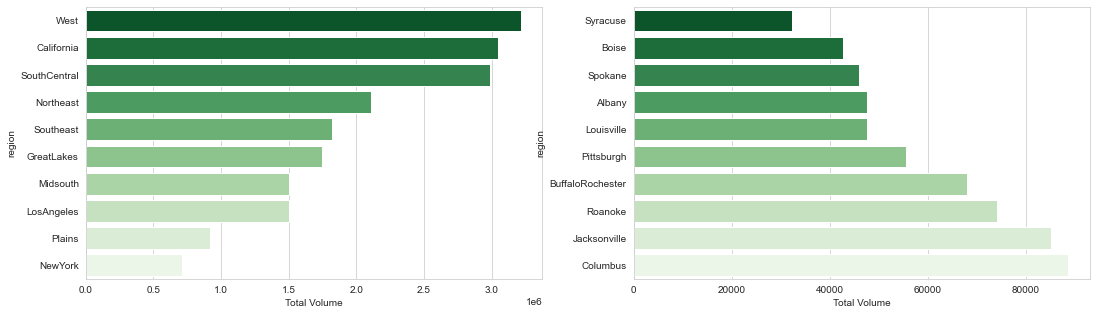

States with the the biggest demand are ['West', 'California', 'SouthCentral', 'Northeast', 'Southeast'] 
States with the least demand are ['Syracuse', 'Boise', 'Spokane', 'Albany', 'Louisville'] 


In [34]:
fig, ax = plt.subplots(1, 2, figsize=(18,5))

avoStates = avo[avo['region'] !='TotalUS']

regionV = avoStates.groupby('region')['Total Volume'].sum()

most = regionV.sort_values(ascending = False).iloc[:10]
least = regionV.sort_values().iloc[:10]

sns.barplot(x='Total Volume', y='region', data = avoStates, order=most.index, ci=None, palette='Greens_r', ax=ax[0])
sns.barplot(x='Total Volume', y='region', data = avoStates, order=least.index, ci=None, palette='Greens_r', ax=ax[1])

plt.show()

most = pd.DataFrame(most).reset_index()
least = pd.DataFrame(least).reset_index()

print('States with the the biggest demand are {} '.format(list(most.iloc[:5,0])))
print('States with the least demand are {} '.format(list(least.iloc[:5,0])))

In the above plot we are trying to understand which states have the highest demand and which ones have the lowest. After all the understanding from EDA, let us now run the classification models to predict the type of avocado and see how they perform  

In [35]:
#Decision tree classifier
from IPython.display import display, HTML

avo_tree = avo

label_encoder = LabelEncoder()

avo_tree["region_code"] = label_encoder.fit_transform(avo_tree["region"])
avo_tree["year_code"] = label_encoder.fit_transform(avo_tree["year"])
avo_tree["month_code"] = label_encoder.fit_transform(avo_tree["month"])
avo_tree = avo_tree.drop(["region", "year","month",'Date','4046_scaled','AveragePrice_scaled','year_month'],axis= 1)
#avo_tree = avo_tree.drop(['Date','4046_scaled', 'AveragePrice_scaled', 'year_month'], axis=1)

target = avo_tree['type']
features = avo_tree.drop(['type'], axis=1)

#Using hold out evaluation
X_train, X_test, y_train, y_test = train_test_split(features.values, target.values, random_state=0)

tree = DecisionTreeClassifier(max_depth=7, random_state=0).fit(X_train, y_train)

print("Accuracy of training set score using hold-out: {:.2f}".format(tree.score(X_train, y_train)))
print("Accuracy of test set score using hold-out: {:.2f}".format(tree.score(X_test, y_test)))

#Using n-fold cross validation
clf = DecisionTreeClassifier()
acc=cross_val_score(clf,features, target, cv=10, scoring='accuracy').mean()
print("Tree Accuracy by N-fold Cross Validation:",acc)



Accuracy of training set score using hold-out: 0.99
Accuracy of test set score using hold-out: 0.99
Tree Accuracy by N-fold Cross Validation: 0.9732019045902428


Decision tree classifier above using Hold-out and N-fold cross validation has an accuracy of 0.99 and 0.973 respectively. On a dataset of this size, hold-out will not be apt since it gives results that is too good to be true. So let us consider n-fold for our reports 

In [63]:
#KNN classifier

avo_model = avo
avo_model = avo.drop(['Date', '4046_scaled', 'AveragePrice_scaled', 'year_month', 'region_encoded'], axis=1)
# encode the categorial 'type' and 'region'
le = LabelEncoder()
#avo_rf['type_encoded'] = le.fit_transform(avo['type'])
avo_model['region_encoded'] = le.fit_transform(avo_model['region'])
# binarize the categorical 'region'
lb = LabelBinarizer()
trns = lb.fit_transform(avo_model['region_encoded'].values)
tmp = pd.DataFrame(trns, columns = ["region_encoded_"+str(int(i)) for i in range(trns.shape[1])])
avo_model = pd.concat([avo_model, tmp], axis=1)
avo_model = avo_model.drop(['region_code', 'region'], axis=1)
target = avo_model['type']
features = avo_model.drop(['type'], axis=1)
clf = KNeighborsClassifier(n_neighbors=12)
#Using hold-out evaluation
X_train, X_test, y_train, y_test = train_test_split(features.values, target.values,random_state=0,test_size = 0.2)
clf.fit(X_train, y_train)
print("KNN accuracy on training set score by hold-out evaluation: {:.2f}".format(clf.score(X_train, y_train)))
print("KNN accuracy on test set score by hold-out evaluation: {:.2f}".format(clf.score(X_test, y_test)))
# by N-fold cross validation
acc=cross_val_score(clf,features, target, cv=10, scoring='accuracy').mean()
print("KNN Accuracy by N-fold Cross Validation:",acc)



KNN accuracy on training set score by hold-out evaluation: 0.97
KNN accuracy on test set score by hold-out evaluation: 0.97
KNN Accuracy by N-fold Cross Validation: 0.9361601478010094


KNN has an accuracy score of 0.97 and 0.93 by using hold-out and n-fold respectively. Again we will be considering n-fold for our reports 

In [65]:
#SVM Classifier

from sklearn.svm import SVC

y = avo_model['type']
x = avo_model.drop(['type'], axis=1)

clf=SVC(kernel='linear', C=1E10)
acc=cross_val_score(clf, x, y, cv=3, scoring='accuracy').mean()
print("Accuracy by N-fold Cross Validation:",acc)


training set score : 0.87
test set score: 0.88


SVM has a score of 0.88 using hold-out evaluation and my laptop does not have enough computational capacity to run n-fold and hence I could not consider this classification technique 

In [67]:
#Let us preprocess data to run random forest classifier 
# encode the categorial 'type' and 'region'
le = LabelEncoder()
avo_rf = avo
avo_rf['type_encoded'] = le.fit_transform(avo['type'])
avo_rf['region_encoded'] = le.fit_transform(avo['region'])

# binarize the categorical 'region'
lb = LabelBinarizer()
trns = lb.fit_transform(avo_rf['region'].values)
tmp = pd.DataFrame(trns, columns = ["region_"+str(int(i)) for i in range(trns.shape[1])])
avo_rf = pd.concat([avo, tmp], axis=1)

# choose features to train against
features = avo_rf.drop(['type', 'type_encoded', 'region', 'region_encoded', 'Date', 'year_month'], axis = 1)
print( "Using features: ", list(features))

# choose output variable
target = avo_rf['type_encoded']

# iterate the types
for typ in avo_rf['type'].unique():
    print(typ)

Using features:  ['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'month', 'day', '4046_scaled', 'AveragePrice_scaled', 'quarter', 'region_code', 'year_code', 'month_code', 'region_0', 'region_1', 'region_2', 'region_3', 'region_4', 'region_5', 'region_6', 'region_7', 'region_8', 'region_9', 'region_10', 'region_11', 'region_12', 'region_13', 'region_14', 'region_15', 'region_16', 'region_17', 'region_18', 'region_19', 'region_20', 'region_21', 'region_22', 'region_23', 'region_24', 'region_25', 'region_26', 'region_27', 'region_28', 'region_29', 'region_30', 'region_31', 'region_32', 'region_33', 'region_34', 'region_35', 'region_36', 'region_37', 'region_38', 'region_39', 'region_40', 'region_41', 'region_42', 'region_43', 'region_44', 'region_45', 'region_46', 'region_47', 'region_48', 'region_49', 'region_50', 'region_51', 'region_52', 'region_53']
conventional
organic


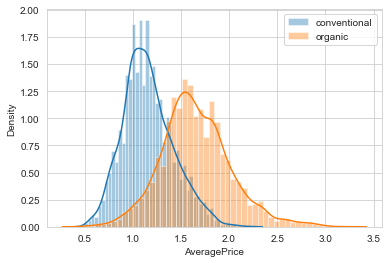

In [68]:
# plot the distribution of price by type
for typ in avo_rf['type'].unique():
    sns.distplot( avo_rf["AveragePrice"][avo_rf['type']==typ], label=typ)
plt.legend()



In [39]:

# Random forest with test and train sets using hold-out 
x_train,x_test,y_train,y_test = train_test_split(features, target, random_state = 0)
rf =  RandomForestClassifier(n_estimators = 100, random_state = 0, max_features = 2).fit(x_train, y_train)
print("Accuracy of training data score using random forest hold-out evaluation {:.4f}".format(rf.score(x_train,y_train)))
print("Accuracy of test data score using random forest hold-out evaluation {:.4f}".format(rf.score(x_test,y_test)))

# Accuracy of randomForest using bagging method of decision trees by n-fold cross validation 
tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8, random_state=1)
acc=cross_val_score(bag, features, target, cv=5, scoring='accuracy').mean()
print("RandomForest Accuracy by N-fold Cross Validation:",acc)


Accuracy of training data score using random forest hold-out evaluation 1.0000
Accuracy of test data score using random forest hold-out evaluation 0.9987
RandomForest Accuracy by N-fold Cross Validation: 0.9887108872012224


Random forest with hold-out evaluation has an accuracy of 0.9987 which is too good to be true and hence we run an n-fold cross validation model which has an accuracy of 0.988. We are again considering n-fold for our final evaluation 

In [44]:
#Logistic regression using hold-out and n-fold 

x_train,x_test,y_train,y_test = train_test_split(features, target, random_state = 0)

#by hold-out evaluation
logreg =  LogisticRegression(penalty='l2', tol=0.0001).fit(x_train,y_train)
print("Accuracy of LogisticRegression train data score:{:.3f}".
     format(logreg.score(x_train,y_train)))
print("Accuracy of LogisticRegression test data score:{:.3f}".
     format(logreg.score(x_test,y_test)))

# by N-fold cross validation
clf=LogisticRegression()
acc=cross_val_score(clf, features, target, cv=5, scoring='accuracy').mean()
print("Accuracy by N-fold Cross Validation:",acc)

Accuracy of LogisticRegression train data score:0.934
Accuracy of LogisticRegression test data score:0.933
Accuracy by N-fold Cross Validation: 0.930406709287964


Logistic regression by hold-out evaluation has an accuracy of 0.933 and that by n-fold has an accuracy of 0.930. 

In [69]:
# 02. K-Means Clustering #############################################
# Requirements: numerical and normalized features

import numpy as np
import scipy as sp
import pandas as pd
from IPython.display import display, HTML

df=pd.read_csv('avocado.csv')
cols=df.columns
#df=df.drop("Unnamed: 0", axis=1,inplace=True) #dropping the column as it pnly contains index
#df=df.drop(['Date'], axis = 1)
# print out and display dataframe as tables in HTML
display(HTML(df.head(10).to_html()))

# replace missing values in numerical variables by using mean value #################################
df["AveragePrice"].fillna(df["AveragePrice"].mean(), inplace=True)
df["Total Volume"].fillna(df["Total Volume"].mean(), inplace=True)
df["4046"].fillna(df["4046"].mean(), inplace=True)
df["4225"].fillna(df["4225"].mean(), inplace=True)
df["4770"].fillna(df["4770"].mean(), inplace=True)
df["Total Bags"].fillna(df["Total Bags"].mean(), inplace=True)
df["Small Bags"].fillna(df["Small Bags"].mean(), inplace=True)
df["Large Bags"].fillna(df["Large Bags"].mean(), inplace=True)
df["XLarge Bags"].fillna(df["XLarge Bags"].mean(), inplace=True)
df["year"].fillna(df["year"].mean(), inplace=True)


# check again whether there are missing values
print('ColumnName, DataType, MissingValues')
for i in cols:
    print(i, ',', df[i].dtype,',',df[i].isnull().any())
 
# removing the Unnamed column as it is contains only the index which is of no use while performing clustering
#df=df.drop("Unnamed: 0", axis=1,inplace=True) #dropping the column as it pnly contains index
df = df.iloc[: , 1:]




                                                                                                                                                                


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


ColumnName, DataType, MissingValues
Unnamed: 0 , int64 , False
Date , object , False
AveragePrice , float64 , False
Total Volume , float64 , False
4046 , float64 , False
4225 , float64 , False
4770 , float64 , False
Total Bags , float64 , False
Small Bags , float64 , False
Large Bags , float64 , False
XLarge Bags , float64 , False
type , object , False
year , int64 , False
region , object , False


In [70]:
from datetime import datetime

df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)

#We are not including date because it does not have any importance for clustering. 

df=df.drop('Date',1)

# print out and display dataframe as tables in HTML
display(HTML(df.head(10).to_html()))

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11
5,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany,11
6,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany,11
7,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany,11
8,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany,11
9,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany,10


In [71]:
# Data preprocessing
# Data preprocessing ################################################################################
print('Column Datatypes:\n',df.dtypes)
# convert all nominal variables to binary variables
df_raw=df.copy(deep=True) 
df_knn=df.copy(deep=True) 
# create new binary columns
#df_dummies=pd.get_dummies(df_knn[['year']])


# add them to dataframe
#df_knn=df_knn.join(df_dummies)
# drop original columns
#df_knn=df_knn.drop('year',axis=1)



display('Data Example:',HTML(df_knn.head(10).to_html()))



Column Datatypes:
 AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
Month             int64
dtype: object


'Data Example:'

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11
5,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany,11
6,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany,11
7,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany,11
8,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany,11
9,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany,10


In [72]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df_knn["region_code"] = label_encoder.fit_transform(df_knn["region"])
df_knn["year_code"] = label_encoder.fit_transform(df_knn["year"])
df_knn["month_code"] = label_encoder.fit_transform(df_knn["Month"])
df_knn = df_knn.drop(["region", "year","Month"],axis= 1)
display(HTML(df_knn.tail(10).to_html()))

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region_code,year_code,month_code
18239,1.56,22128.42,2162.67,3194.25,8.93,16762.57,16510.32,252.25,0.0,organic,53,3,2
18240,1.54,17393.30,1832.24,1905.57,0.00,13655.49,13401.93,253.56,0.0,organic,53,3,2
18241,1.57,18421.24,1974.26,2482.65,0.00,13964.33,13698.27,266.06,0.0,organic,53,3,1
18242,1.56,17597.12,1892.05,1928.36,0.00,13776.71,13553.53,223.18,0.0,organic,53,3,1
18243,1.57,15986.17,1924.28,1368.32,0.00,12693.57,12437.35,256.22,0.0,organic,53,3,1
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,53,3,1
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,53,3,0
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,53,3,0
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,53,3,0
18248,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,53,3,0


In [73]:
# Normalized all numerical features
# find numeric columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
cols_numeric = df_knn.select_dtypes(include=numerics).columns.tolist()
print('Selected numerical columns:\n',cols_numeric)    

# min-max normalization to scale [0, 1]
for col in cols_numeric:
    df_knn[col]=(df_knn[col]-df_knn[col].min())/(df_knn[col].max()-df_knn[col].min())

# We ignore the label column
df_kmeans=df_knn.drop('type',axis=1)

display(HTML(df_kmeans.head(1000).to_html()))

Selected numerical columns:
 ['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'region_code', 'year_code', 'month_code']


,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region_code,year_code,month_code
0,0.316726,0.001026,0.000046,0.002660,0.000019,0.000449,0.000643,1.630502e-05,0.000000,0.000000,0.0,1.000000
1,0.323843,0.000877,0.000030,0.002181,0.000023,0.000491,0.000703,1.704640e-05,0.000000,0.000000,0.0,1.000000
2,0.174377,0.001890,0.000035,0.005332,0.000051,0.000420,0.000601,1.803432e-05,0.000000,0.000000,0.0,1.000000
3,0.227758,0.001262,0.000050,0.003516,0.000029,0.000300,0.000424,2.338831e-05,0.000000,0.000000,0.0,1.000000
4,0.298932,0.000815,0.000041,0.002142,0.000030,0.000319,0.000447,3.456665e-05,0.000000,0.000000,0.0,0.909091
5,0.291815,0.000894,0.000052,0.002348,0.000017,0.000345,0.000490,2.228324e-05,0.000000,0.000000,0.0,0.909091
6,0.195730,0.001334,0.000060,0.003599,0.000037,0.000429,0.000612,2.134078e-05,0.000000,0.000000,0.0,0.909091
7,0.192171,0.001749,0.000031,0.004974,0.000031,0.000353,0.000468,9.833196e-05,0.000000,0.000000,0.0,0.909091
8,0.206406,0.001595,0.000045,0.004265,0.000034,0.000588,0.000830,4.962847e-05,0.000000,0.000000,0.0,0.909091
9,0.224199,0.001188,0.000037,0.003163,0.000044,0.000445,0.000602,9.869566e-05,0.000000,0.000000,0.0,0.818182


In [74]:
# KMeans clustering ####################################################################
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.cluster import KMeans

# API, https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

kmeans=KMeans(n_clusters=2, random_state=1,max_iter=200)
kmeans.fit(df_kmeans)
y_pred=kmeans.predict(df_kmeans)



'Data:'

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region_code,year_code,month_code,Cluster
0,0.316726,0.001026,0.000046,0.002660,0.000019,0.000449,0.000643,0.000016,0.0,0.0,0.0,1.000000,1
1,0.323843,0.000877,0.000030,0.002181,0.000023,0.000491,0.000703,0.000017,0.0,0.0,0.0,1.000000,1
2,0.174377,0.001890,0.000035,0.005332,0.000051,0.000420,0.000601,0.000018,0.0,0.0,0.0,1.000000,1
3,0.227758,0.001262,0.000050,0.003516,0.000029,0.000300,0.000424,0.000023,0.0,0.0,0.0,1.000000,1
4,0.298932,0.000815,0.000041,0.002142,0.000030,0.000319,0.000447,0.000035,0.0,0.0,0.0,0.909091,1


'Data:'

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region_code,year_code,month_code,Cluster
18244,0.423488,0.000272,0.000090,0.000075,0.000000,0.000697,0.000976,0.000076,0.0,1.0,1.0,0.090909,0
18245,0.451957,0.000221,0.000052,0.000168,0.000000,0.000478,0.000668,0.000057,0.0,1.0,1.0,0.000000,0
18246,0.508897,0.000219,0.000052,0.000120,0.000286,0.000485,0.000699,0.000007,0.0,1.0,1.0,0.000000,0
18247,0.530249,0.000258,0.000067,0.000146,0.000286,0.000566,0.000816,0.000009,0.0,1.0,1.0,0.000000,0
18248,0.419929,0.000278,0.000127,0.000115,0.000088,0.000620,0.000896,0.000005,0.0,1.0,1.0,0.000000,0


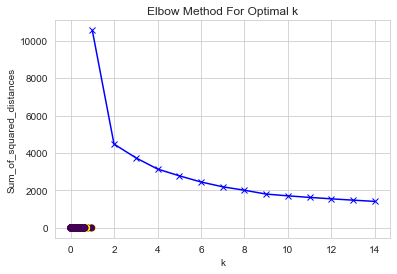

In [75]:
Kmeans_cluster=plt.scatter(df_kmeans['AveragePrice'],df_kmeans['Total Bags'],c=y_pred,cmap='viridis')


# get the cluster labels and add it back to the original data
opt=kmeans.labels_
df_kmeans['Cluster']=opt
display('Data:',HTML(df_kmeans.head(5).to_html()))
display('Data:',HTML(df_kmeans.tail(5).to_html()))


# try different K value and find the best K for KMeans
# Assumption: SSE is smaller, it is better

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_kmeans)
    Sum_of_squared_distances.append(km.inertia_)
    
# Plot K and SSE, observe which one is better
# In the plot, the elbow on the arm is optimal k
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()


In [ ]:
#By Implementing the elbow method for best K, we found that best value of K is 2, as there is a significant difference
#in SSE from k=1 to k=2. Hence we need to go back and insert 2 in n_clusters=2 in the Kmeans function. 
#By default Kmeans function has max_iter=200. We can also increase the max iterations - the no. of times we need the model
#to run. 
#The bottomline is that we need to try different parameters(n_clusters, max_iter) to get the useful results. 

In [ ]:
#We can evaluate the clustering results by using those results as inputs to classification tasks, and if the accuracy of 
#supervised learning increases, we can conclude that the clustering results were useful. 

In [76]:
df_usl=df_kmeans.copy(deep=True) 
# create new binary columns
type_dummies=pd.get_dummies(df['type'])
# add them to dataframe
df_usl=df_usl.join(type_dummies)
# drop original columns
#avo_km=avo_km.drop('type',axis=1)

In [77]:
display('Data:',HTML(df_usl.tail(5).to_html()))


'Data:'

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region_code,year_code,month_code,Cluster,conventional,organic
18244,0.423488,0.000272,0.000090,0.000075,0.000000,0.000697,0.000976,0.000076,0.0,1.0,1.0,0.090909,0,0,1
18245,0.451957,0.000221,0.000052,0.000168,0.000000,0.000478,0.000668,0.000057,0.0,1.0,1.0,0.000000,0,0,1
18246,0.508897,0.000219,0.000052,0.000120,0.000286,0.000485,0.000699,0.000007,0.0,1.0,1.0,0.000000,0,0,1
18247,0.530249,0.000258,0.000067,0.000146,0.000286,0.000566,0.000816,0.000009,0.0,1.0,1.0,0.000000,0,0,1
18248,0.419929,0.000278,0.000127,0.000115,0.000088,0.000620,0.000896,0.000005,0.0,1.0,1.0,0.000000,0,0,1


In [78]:
df_results=df_kmeans.drop('Cluster', axis=1)
df_results

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region_code,year_code,month_code
0,0.316726,0.001026,0.000046,0.002660,0.000019,0.000449,0.000643,0.000016,0.0,0.0,0.0,1.000000
1,0.323843,0.000877,0.000030,0.002181,0.000023,0.000491,0.000703,0.000017,0.0,0.0,0.0,1.000000
2,0.174377,0.001890,0.000035,0.005332,0.000051,0.000420,0.000601,0.000018,0.0,0.0,0.0,1.000000
3,0.227758,0.001262,0.000050,0.003516,0.000029,0.000300,0.000424,0.000023,0.0,0.0,0.0,1.000000
4,0.298932,0.000815,0.000041,0.002142,0.000030,0.000319,0.000447,0.000035,0.0,0.0,0.0,0.909091
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,0.423488,0.000272,0.000090,0.000075,0.000000,0.000697,0.000976,0.000076,0.0,1.0,1.0,0.090909
18245,0.451957,0.000221,0.000052,0.000168,0.000000,0.000478,0.000668,0.000057,0.0,1.0,1.0,0.000000
18246,0.508897,0.000219,0.000052,0.000120,0.000286,0.000485,0.000699,0.000007,0.0,1.0,1.0,0.000000
18247,0.530249,0.000258,0.000067,0.000146,0.000286,0.000566,0.000816,0.000009,0.0,1.0,1.0,0.000000


In [79]:
# create new binary columns
df_dummies=pd.get_dummies(df[['region']])
# add them to dataframe
df_usl=df_usl.join(df_dummies)
# drop original columns
df_usl=df_usl.drop('region_code',axis=1)
df_usl
#df_knn=df_knn.drop('Nationality', axis=1)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year_code,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,0.316726,0.001026,0.000046,0.002660,0.000019,0.000449,0.000643,0.000016,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0.323843,0.000877,0.000030,0.002181,0.000023,0.000491,0.000703,0.000017,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0.174377,0.001890,0.000035,0.005332,0.000051,0.000420,0.000601,0.000018,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0.227758,0.001262,0.000050,0.003516,0.000029,0.000300,0.000424,0.000023,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.298932,0.000815,0.000041,0.002142,0.000030,0.000319,0.000447,0.000035,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,0.423488,0.000272,0.000090,0.000075,0.000000,0.000697,0.000976,0.000076,0.0,1.0,...,0,0,0,0,0,0,0,0,0,1
18245,0.451957,0.000221,0.000052,0.000168,0.000000,0.000478,0.000668,0.000057,0.0,1.0,...,0,0,0,0,0,0,0,0,0,1
18246,0.508897,0.000219,0.000052,0.000120,0.000286,0.000485,0.000699,0.000007,0.0,1.0,...,0,0,0,0,0,0,0,0,0,1
18247,0.530249,0.000258,0.000067,0.000146,0.000286,0.000566,0.000816,0.000009,0.0,1.0,...,0,0,0,0,0,0,0,0,0,1


In [80]:
#Let us preprocess data to run random forest classifier 
# encode the categorial 'type' and 'region'
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier 
from sklearn.model_selection import cross_val_score

le = LabelEncoder()
avo_rf = df_usl
avo_rf['type_encoded'] = le.fit_transform(df['type'])
#avo_rf['region_encoded'] = le.fit_transform(df['region'])



# choose features to train against
features = avo_rf.drop(['month_code'], axis = 1)
print( "Using features: ", list(features))

# choose output variable
target = avo_rf['type_encoded']


tree = DecisionTreeClassifier()
# Note: you can use tree only or the random forest for the purpose of evaluations
#y = avo_rf['type']
#x = avo_model.drop(['type'], axis=1)

bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8, random_state=1)

 
acc=cross_val_score(bag, features, target, cv=5, scoring='accuracy').mean()
print("RandomForest Accuracy by N-fold Cross Validation:",acc)

Using features:  ['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year_code', 'Cluster', 'conventional', 'organic', 'region_Albany', 'region_Atlanta', 'region_BaltimoreWashington', 'region_Boise', 'region_Boston', 'region_BuffaloRochester', 'region_California', 'region_Charlotte', 'region_Chicago', 'region_CincinnatiDayton', 'region_Columbus', 'region_DallasFtWorth', 'region_Denver', 'region_Detroit', 'region_GrandRapids', 'region_GreatLakes', 'region_HarrisburgScranton', 'region_HartfordSpringfield', 'region_Houston', 'region_Indianapolis', 'region_Jacksonville', 'region_LasVegas', 'region_LosAngeles', 'region_Louisville', 'region_MiamiFtLauderdale', 'region_Midsouth', 'region_Nashville', 'region_NewOrleansMobile', 'region_NewYork', 'region_Northeast', 'region_NorthernNewEngland', 'region_Orlando', 'region_Philadelphia', 'region_PhoenixTucson', 'region_Pittsburgh', 'region_Plains', 'region_Portland', 'region_RaleighGree

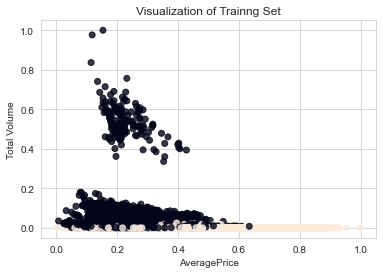

K = 1 , Accuracy:  1.0 , Precision:  1.0 , Recall:  1.0
K = 3 , Accuracy:  1.0 , Precision:  1.0 , Recall:  1.0
K = 5 , Accuracy:  1.0 , Precision:  1.0 , Recall:  1.0
K = 7 , Accuracy:  1.0 , Precision:  1.0 , Recall:  1.0
K = 9 , Accuracy:  1.0 , Precision:  1.0 , Recall:  1.0
K = 11 , Accuracy:  1.0 , Precision:  1.0 , Recall:  1.0
K = 13 , Accuracy:  1.0 , Precision:  1.0 , Recall:  1.0
K = 15 , Accuracy:  1.0 , Precision:  1.0 , Recall:  1.0
K = 17 , Accuracy:  1.0 , Precision:  1.0 , Recall:  1.0
K = 19 , Accuracy:  1.0 , Precision:  1.0 , Recall:  1.0
K = 21 , Accuracy:  1.0 , Precision:  1.0 , Recall:  1.0
K = 23 , Accuracy:  1.0 , Precision:  1.0 , Recall:  1.0


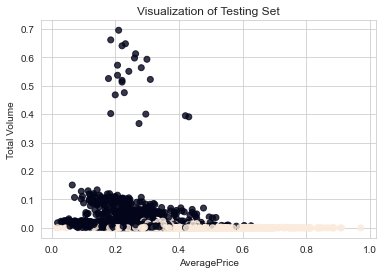

K = 1 , Accuracy:  1.0
K = 3 , Accuracy:  1.0
K = 5 , Accuracy:  1.0
K = 7 , Accuracy:  1.0
K = 9 , Accuracy:  1.0
K = 11 , Accuracy:  1.0
K = 13 , Accuracy:  1.0
K = 15 , Accuracy:  1.0
K = 17 , Accuracy:  1.0
K = 19 , Accuracy:  1.0


In [81]:
# Build KNN models and evaluate the models ############################################################

# By hold-out evaluations ###############################################
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns

# preprocess label, since KNN requires label encoding
from sklearn import preprocessing


y = df_knn['type'] # define label as nominal values
le = preprocessing.LabelEncoder()
le.fit(y)
y_encoded = le.transform(y) # encode nominal labels to integers #####################################

df_knn['type'] = y_encoded
x = df_usl
y = df_knn['type'] 

x_train, x_test, y_train, y_test = train_test_split(df_usl, y_encoded, 
                                                    test_size=0.2)
# print(type(y_train), 'count of unique values = ', y_train.unique().size)

# Visualize train set
plt.figure(1)
plt.scatter(x_train['AveragePrice'], x_train['Total Volume'], c=y_train, alpha = 0.8)
plt.xlabel('AveragePrice')
plt.ylabel('Total Volume')
plt.title('Visualization of Trainng Set')
plt.show()
plt.close()

# build and eval models
from sklearn import neighbors
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# API for KNeighborsClassifier
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

for k in range(1, 24, 2): 
    clf=neighbors.KNeighborsClassifier(k, weights='uniform')
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print('K =', k, ', Accuracy: ', accuracy_score(y_test, y_pred), ', Precision: ', precision_score(y_test, y_pred, average='micro'),
         ', Recall: ', recall_score(y_test, y_pred, average='micro'))
    
# Visualize the best model on the test set
clf=neighbors.KNeighborsClassifier(1, weights='uniform')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

plt.figure(2)
plt.scatter(x_test['AveragePrice'], x_test['Total Volume'], c=y_pred, alpha = 0.8)
plt.xlabel('AveragePrice')
plt.ylabel('Total Volume')
plt.title('Visualization of Testing Set')
plt.show()
plt.close()


# By N-fold cross evaluations ###############################################
from sklearn.model_selection import cross_val_score

for k in range(1, 20, 2): 
    clf=neighbors.KNeighborsClassifier(k, weights='uniform')
    acc=cross_val_score(clf, x, y, cv=5, scoring='accuracy').mean()
    print('K =', k, ', Accuracy: ',acc)

'Data:'

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region_code,year_code,month_code
0,0.316726,0.001026,0.000046,0.002660,0.000019,0.000449,0.000643,0.000016,0.0,0.0,0.0,1.000000
1,0.323843,0.000877,0.000030,0.002181,0.000023,0.000491,0.000703,0.000017,0.0,0.0,0.0,1.000000
2,0.174377,0.001890,0.000035,0.005332,0.000051,0.000420,0.000601,0.000018,0.0,0.0,0.0,1.000000
3,0.227758,0.001262,0.000050,0.003516,0.000029,0.000300,0.000424,0.000023,0.0,0.0,0.0,1.000000
4,0.298932,0.000815,0.000041,0.002142,0.000030,0.000319,0.000447,0.000035,0.0,0.0,0.0,0.909091
5,0.291815,0.000894,0.000052,0.002348,0.000017,0.000345,0.000490,0.000022,0.0,0.0,0.0,0.909091
6,0.195730,0.001334,0.000060,0.003599,0.000037,0.000429,0.000612,0.000021,0.0,0.0,0.0,0.909091
7,0.192171,0.001749,0.000031,0.004974,0.000031,0.000353,0.000468,0.000098,0.0,0.0,0.0,0.909091
8,0.206406,0.001595,0.000045,0.004265,0.000034,0.000588,0.000830,0.000050,0.0,0.0,0.0,0.909091
9,0.224199,0.001188,0.000037,0.003163,0.000044,0.000445,0.000602,0.000099,0.0,0.0,0.0,0.818182


'Data after clustering:'

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region_code,year_code,month_code,Cluster
0,0.316726,0.001026,0.000046,0.002660,0.000019,0.000449,0.000643,0.000016,0.0,0.0,0.0,1.000000,0
1,0.323843,0.000877,0.000030,0.002181,0.000023,0.000491,0.000703,0.000017,0.0,0.0,0.0,1.000000,0
2,0.174377,0.001890,0.000035,0.005332,0.000051,0.000420,0.000601,0.000018,0.0,0.0,0.0,1.000000,0
3,0.227758,0.001262,0.000050,0.003516,0.000029,0.000300,0.000424,0.000023,0.0,0.0,0.0,1.000000,0
4,0.298932,0.000815,0.000041,0.002142,0.000030,0.000319,0.000447,0.000035,0.0,0.0,0.0,0.909091,0
5,0.291815,0.000894,0.000052,0.002348,0.000017,0.000345,0.000490,0.000022,0.0,0.0,0.0,0.909091,0
6,0.195730,0.001334,0.000060,0.003599,0.000037,0.000429,0.000612,0.000021,0.0,0.0,0.0,0.909091,0
7,0.192171,0.001749,0.000031,0.004974,0.000031,0.000353,0.000468,0.000098,0.0,0.0,0.0,0.909091,0
8,0.206406,0.001595,0.000045,0.004265,0.000034,0.000588,0.000830,0.000050,0.0,0.0,0.0,0.909091,0
9,0.224199,0.001188,0.000037,0.003163,0.000044,0.000445,0.000602,0.000099,0.0,0.0,0.0,0.818182,0


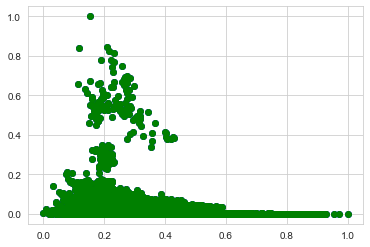

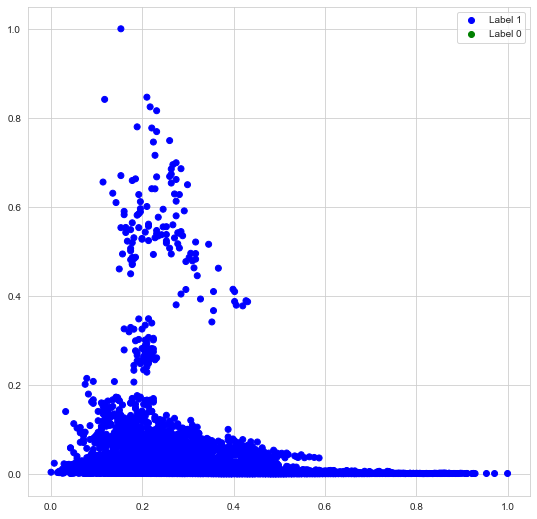

In [82]:
# 03. DBSCAN - Density-based Clustering

from sklearn.cluster import DBSCAN

# API: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html
df_dbscan=df_kmeans.drop(['Cluster'],axis=1)
display('Data:',HTML(df_dbscan.head(10).to_html()))

# Numpy array of all the cluster labels assigned to each data point 
db_default = DBSCAN(eps = 0.8, min_samples = 5).fit(df_dbscan) 
labels = db_default.labels_ 
df_dbscan['Cluster']=labels
display('Data after clustering:',HTML(df_dbscan.head(10).to_html()))

# Visualize the clusters

# Building the label to colour mapping 
# Need to figure out how many clusters were produced, then assign different number of the colors
colours = {} 
colours[0] = 'b'
colours[1] = 'g'


  
# Building the colour vector for each data point 
cvec = [colours[label] for label in labels] 
  
# For the construction of the legend of the plot 
b = plt.scatter(df_dbscan['AveragePrice'], df_dbscan['Total Bags'], color ='b'); 
g = plt.scatter(df_dbscan['AveragePrice'], df_dbscan['Total Bags'], color ='g'); 

  
# Plotting P1 on the X-Axis and P2 on the Y-Axis  
# according to the colour vector defined 
plt.figure(figsize =(9, 9)) 
plt.scatter(df_dbscan['AveragePrice'], df_dbscan['Total Bags'], c = cvec)   
# Building the legend 
plt.legend((b, g), ('Label 1', 'Label 0'))   
plt.show()

In [ ]:
# 04. Hierarchical Clustering

from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc 

# API, https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

df_hc=df_knn.drop(['type'],axis=1)
display('Data:',HTML(df_hc.tail(10).to_html()))

# Plot Dendrogram
plt.figure(figsize =(16, 16)) 
plt.title('Visualising the data') 
Dendrogram = shc.dendrogram((shc.linkage(df_hc, method ='single'))) 

# Clustering based on the Dendrogram
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single')
cls=cluster.fit_predict(df_hc)
print(cluster.labels_)

# Visualizing the clustering 
plt.figure(figsize =(6, 6)) 
plt.scatter(df_dbscan['AveragePrice'], df_dbscan['Total Bags'],  
           c = cls, cmap ='rainbow') 
plt.show()